# Importar dados

In [1]:
import pandas as pd
train_data = pd.read_csv(r'../data/train.csv')
test_data = pd.read_csv(r'../data/test.csv')

In [2]:
train_data.shape

(112, 4)

# Analisar Dados

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         112 non-null    int64
 1   age        112 non-null    int64
 2   sex        112 non-null    int64
 3   education  112 non-null    int64
dtypes: int64(4)
memory usage: 3.6 KB


In [4]:
train_data.describe()

,id,age,sex,education
count,112.000000,112.000000,112.000000,112.000000
mean,56.500000,44.312500,0.482143,9.035714
std,32.475632,22.642156,0.501927,4.909870
min,1.000000,13.000000,0.000000,0.000000
25%,28.750000,20.000000,0.000000,4.000000
50%,56.500000,51.500000,0.000000,9.000000
75%,84.250000,65.250000,1.000000,12.000000
max,112.000000,79.000000,1.000000,20.000000


In [5]:
#fig = plt.figure(figsize = (20,5))
#ax = fig.gca()
#train_data['education'].hist(ax = ax)
train_data.head()

,id,age,sex,education
0,1,13,1,7
1,2,14,0,8
2,3,15,1,9
3,4,15,1,9
4,5,15,1,9


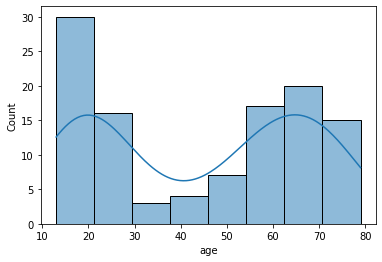

In [6]:
#train_data.isna().any()

import seaborn as sns
#sns.histplot(train_data['age'], kde='True')
#sns.histplot(train_data['sex'], kde='True')
sns.histplot(train_data['age'], kde='True')

#sns.boxplot(x=train_data['age'])
#sns.boxplot(x=train_data['sex'])
#sns.boxplot(x=train_data['education'])

import matplotlib.pyplot as plt
#corr_matrix = train_data.corr()
#f, ax = plt.subplots(figsize=(8,6))
#sns.heatmap(corr_matrix, vmin=1, vmax=1, square=True, annot=True)

# Tratar Dados

# Visualisar os dados

In [7]:
import numpy as np
import scipy.io

mat = scipy.io.loadmat('../data/train_data.mat')

X = mat["train_data"]
print(X)

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.13152513 0.11770353 0.15580596 ... 0.11608478 0.15665442 0.11458643]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.02631835 0.01242944 0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.01770987 0.         0.        ]]

 [[0.13152513 0.11770353 0.15580596 ... 0.11608478 0.15665442 0.11458643]
  [0.         0.      

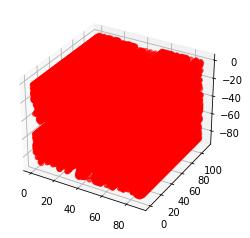

In [8]:
#todos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

z,x,y = X.nonzero()
            
ax.scatter(x, y, -z, zdir='z', c= 'red')
plt.show()

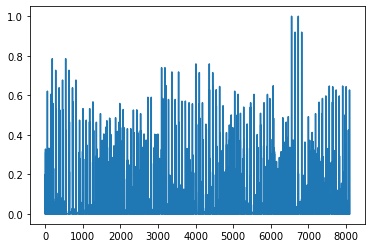

In [9]:
#Exemplo 1 pessoa
store = []
for i in range(90):
    for j in range (90):
        store.append(X[i][j][15])
        #print(X[i][j][0])
        
plt.plot(store)

# Importar matrizes de conectividade

In [10]:
def get_data_from_mat(train_file,test_file):
    train_mat = scipy.io.loadmat(train_file) 
    test_mat = scipy.io.loadmat(test_file) 
    print(train_mat.keys())
    print(test_mat.keys())
    train_np = np.array(train_mat['train_data']).transpose(2,0,1)
    test_np = np.array(test_mat['test_data']).transpose(2,0,1)
    print(train_np.shape)
    print(test_np.shape)
    return  train_np, test_np


train_mat, test_mat = get_data_from_mat('../data/train_data.mat','../data/test_data.mat')

dict_keys(['__header__', '__version__', '__globals__', 'train_data'])
dict_keys(['__header__', '__version__', '__globals__', 'test_data'])
(112, 90, 90)
(28, 90, 90)


# Treinar o modelo 1 - Utilizar os dados das matrizes e apenas as labels do csv


In [11]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18173987309646354721
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4160159744
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6410691605848035631
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [12]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense, Embedding, BatchNormalization,Activation,Dropout
from livelossplot.inputs.tf_keras import PlotLossesCallback
from tensorflow.keras.initializers import RandomNormal, Constant

y_train = train_data['age']
x_train = train_mat
x_train = tf.expand_dims(x_train, axis=-1)


model = Sequential()

# 1st Conv Block
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(90,90,1)))
model.add(BatchNormalization(momentum=0.5))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization(momentum=0.5))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =2, strides =2, padding ='same'))

# 2nd Conv Block
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization(momentum=0.5))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization(momentum=0.5))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =2, strides =2, padding ='same'))

# 3rd Conv Block
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization(momentum=0.5))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization(momentum=0.5))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization(momentum=0.5))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =2, strides =2, padding ='same'))

# 4th Conv Block
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization(momentum=0.5))
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization(momentum=0.5))
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization(momentum=0.5))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =2, strides =2, padding ='same'))

# 5th Conv Block
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization(momentum=0.5))
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization(momentum=0.5))
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization(momentum=0.5))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =2, strides =2, padding ='same'))

# Fully connected layers

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 90, 90, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 90, 90, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 90, 90, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 90, 90, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 90, 90, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 45, 45, 64)        0

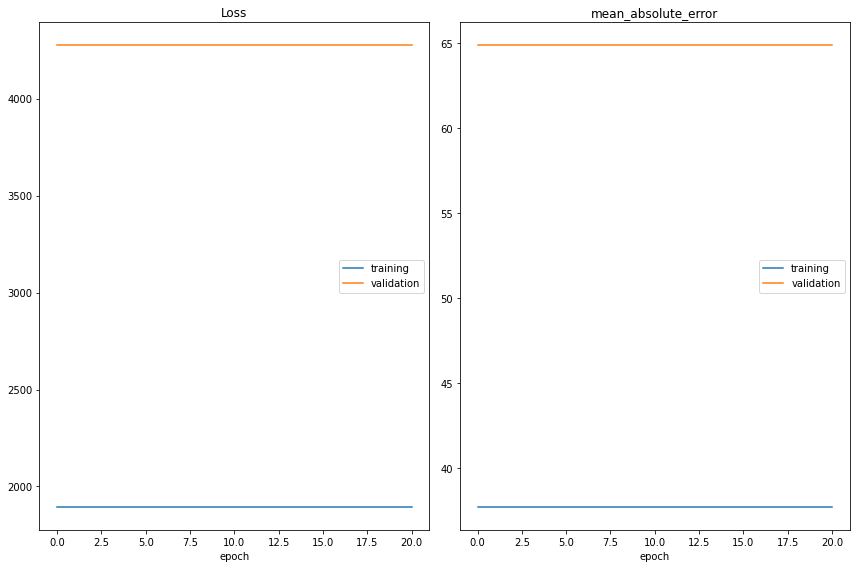

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics='mean_absolute_error')





history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[PlotLossesCallback()])

# Aplicar o modelo às matrizes de treino

In [17]:
print("Evaluate")
train_mat = tf.expand_dims(train_mat, axis=-1)
result = model.predict(train_mat)
print(result)

Evaluate
[[6.4348583e-06 1.0731285e-05 1.5518061e-05 ... 7.7819032e-06
  2.7768726e-06 1.4142190e-05]
 [1.6739328e-06 4.2158908e-06 4.7346230e-06 ... 2.1587025e-06
  5.1974246e-07 4.7617286e-06]
 [2.7764943e-06 5.0031404e-06 6.6658772e-06 ... 3.2714379e-06
  1.1566956e-06 6.6550474e-06]
 ...
 [3.5155728e-12 2.0175236e-11 1.6954160e-11 ... 5.0035314e-12
  8.7797581e-13 2.6549759e-11]
 [3.9062507e-11 1.7504263e-10 1.6254235e-10 ... 5.4768686e-11
  1.0062916e-11 2.0768913e-10]
 [2.7509954e-12 1.6157414e-11 1.2380028e-11 ... 4.2960292e-12
  7.0432760e-13 2.1720582e-11]]


In [21]:
result.shape

(112, 1)

# Treinar o modelo 2 - com os dados todos do csv mais os resultados do primeiro treino

In [22]:
result = pd.DataFrame(result,columns=['RMage'])
train_data['RMage']=result



In [23]:
train_data.shape

(112, 5)

In [24]:
train_data.describe()

,id,age,sex,education,RMage
count,112.000000,112.000000,112.000000,112.000000,112.000000
mean,56.500000,44.312500,0.482143,9.035714,77.793602
std,32.475632,22.642156,0.501927,4.909870,19.163349
min,1.000000,13.000000,0.000000,0.000000,48.286999
25%,28.750000,20.000000,0.000000,4.000000,59.453528
50%,56.500000,51.500000,0.000000,9.000000,75.374302
75%,84.250000,65.250000,1.000000,12.000000,96.453197
max,112.000000,79.000000,1.000000,20.000000,112.963211


In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         112 non-null    int64  
 1   age        112 non-null    int64  
 2   sex        112 non-null    int64  
 3   education  112 non-null    int64  
 4   RMage      112 non-null    float32
dtypes: float32(1), int64(4)
memory usage: 4.1 KB


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Embedding, SimpleRNN, Dense, Dropout

model2 = Sequential()
model2.add(Dense(128, activation='relu', input_shape=(3,)))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(.2))
model2.add(Dense(1, activation='relu'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 115,841
Trainable params: 115,841
Non-trainable params: 0
________________________________________________

In [27]:
model2.compile(optimizer='adam', loss='mean_squared_error', metrics='mean_absolute_percentage_error')


x_train = train_data.drop(['age','id'],axis=1)
y_train = train_data['age']

x_train.shape



(112, 3)

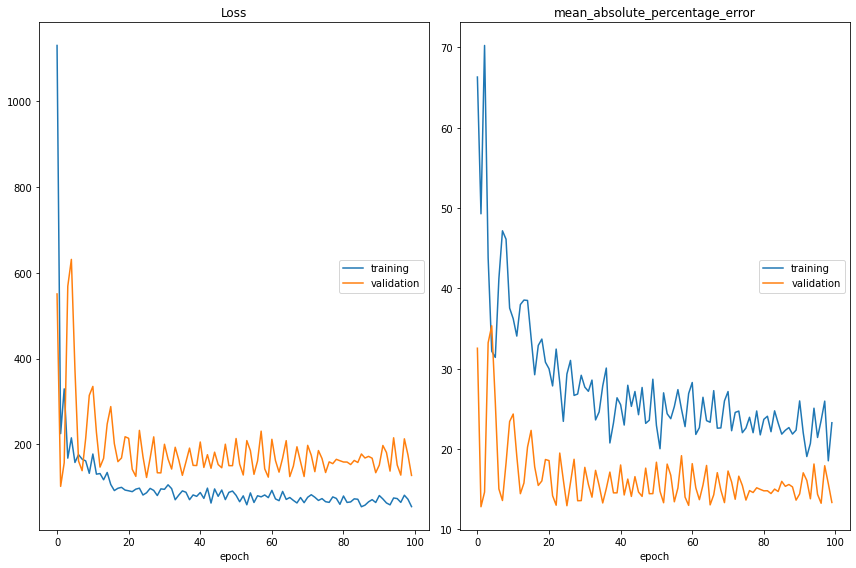

Loss
	training         	 (min:   54.601, max: 1130.518, cur:   54.899)
	validation       	 (min:  102.110, max:  631.535, cur:  127.671)
mean_absolute_percentage_error
	training         	 (min:   18.543, max:   70.250, cur:   23.282)
	validation       	 (min:   12.825, max:   35.352, cur:   13.357)


In [28]:
history2 = model2.fit(x_train, y_train, epochs=100, batch_size=32,validation_split=0.2, callbacks=[PlotLossesCallback()])

# Testar o modelo 2

In [29]:
test_mat = tf.expand_dims(test_mat, axis=-1)
result = model.predict(test_mat)
print(result)

[[ 63.562965]
 [ 55.564117]
 [ 55.81901 ]
 [ 56.63248 ]
 [ 61.172527]
 [ 65.97651 ]
 [ 88.8731  ]
 [ 73.21056 ]
 [ 81.66074 ]
 [ 96.37616 ]
 [ 88.369354]
 [113.09731 ]
 [104.238075]
 [ 97.87919 ]
 [ 49.691605]
 [ 56.370705]
 [ 57.976295]
 [ 65.4738  ]
 [ 63.521255]
 [ 68.95689 ]
 [ 75.07112 ]
 [102.40189 ]
 [ 71.66938 ]
 [112.55453 ]
 [ 84.233734]
 [100.29868 ]
 [ 85.96372 ]
 [ 88.047844]]


In [30]:
result = pd.DataFrame(result,columns=['RMage'])
test_data['RMage']=result

In [31]:
resultados_finais = model2.predict(test_data.drop(['id'],axis=1))
print(resultados_finais)

[[29.881426]
 [26.314497]
 [27.18691 ]
 [23.468897]
 [29.445053]
 [27.863247]
 [58.56699 ]
 [51.960712]
 [49.94369 ]
 [68.47956 ]
 [47.079678]
 [78.247246]
 [77.23636 ]
 [68.50223 ]
 [22.02071 ]
 [24.580793]
 [29.104483]
 [27.57377 ]
 [26.435846]
 [30.45388 ]
 [51.206448]
 [75.60323 ]
 [48.44281 ]
 [88.60185 ]
 [61.03453 ]
 [71.65647 ]
 [61.24102 ]
 [61.73432 ]]


# Prepare submission

In [33]:
with open("submissao.csv", "w") as sub:
    # Writing data to a file
    sub.write('id,age\n')
    for i in test_data['id']:
        sub.write(str(i)+','+str(round(float(resultados_finais[i-1])))+'\n')
    